# 文件读写

In [6]:
using DelimitedFiles
using Random

## 写入矩阵

In [7]:
N = 100
x = rand(collect(1:10), N)
y = randn(N)
[x y]

100×2 Matrix{Float64}:
  5.0000   0.5874
  1.0000   1.3194
 10.0000  -0.2325
  4.0000  -0.0953
  7.0000  -0.9334
  6.0000  -1.4011
  3.0000   0.5225
  1.0000  -1.1280
  9.0000  -1.1825
  8.0000   0.2025
 10.0000   0.2230
  9.0000   1.4362
  3.0000  -0.8333
  ⋮       
  6.0000   0.2200
  8.0000  -0.1233
  3.0000  -0.8596
  1.0000   0.4235
 10.0000  -0.4180
  3.0000  -0.0901
  9.0000   0.4718
  1.0000   0.1579
  6.0000   0.8030
  9.0000   0.4695
  1.0000   1.4023
  3.0000  -1.5081

In [8]:
pwd()

"/mnt/c/Users/XJZ/Desktop/Coding/Julia"

In [9]:
writedlm("./Data/xy.txt", [x y], ',')

## 读取矩阵

In [10]:
readdlm("./Data/xy.txt", ',')

100×2 Matrix{Float64}:
  5.0000   0.5874
  1.0000   1.3194
 10.0000  -0.2325
  4.0000  -0.0953
  7.0000  -0.9334
  6.0000  -1.4011
  3.0000   0.5225
  1.0000  -1.1280
  9.0000  -1.1825
  8.0000   0.2025
 10.0000   0.2230
  9.0000   1.4362
  3.0000  -0.8333
  ⋮       
  6.0000   0.2200
  8.0000  -0.1233
  3.0000  -0.8596
  1.0000   0.4235
 10.0000  -0.4180
  3.0000  -0.0901
  9.0000   0.4718
  1.0000   0.1579
  6.0000   0.8030
  9.0000   0.4695
  1.0000   1.4023
  3.0000  -1.5081

## 创建CSV

In [11]:
using CSV
using DataFrames

In [12]:
df = DataFrame("x" => x, "y" => y)

,x,y
,Int64,Float64
1,5,0.5874
2,1,1.3194
3,10,-0.2325
4,4,-0.0953
5,7,-0.9334
6,6,-1.4011
7,3,0.5225
8,1,-1.1280
9,9,-1.1825


In [13]:
CSV.write("./Data/xy.csv", df)

"./Data/xy.csv"

## 读取CSV

In [14]:
CSV.read("./Data/xy.csv", DataFrame)

,x,y
,Int64,Float64
1,5,0.5874
2,1,1.3194
3,10,-0.2325
4,4,-0.0953
5,7,-0.9334
6,6,-1.4011
7,3,0.5225
8,1,-1.1280
9,9,-1.1825


In [15]:
value, header = readdlm("./Data/xy.csv", ','; header = true)

([5.0000 0.5874; 1.0000 1.3194; … ; 1.0000 1.4023; 3.0000 -1.5081], AbstractString["x" "y"])

In [16]:
value

100×2 Matrix{Float64}:
  5.0000   0.5874
  1.0000   1.3194
 10.0000  -0.2325
  4.0000  -0.0953
  7.0000  -0.9334
  6.0000  -1.4011
  3.0000   0.5225
  1.0000  -1.1280
  9.0000  -1.1825
  8.0000   0.2025
 10.0000   0.2230
  9.0000   1.4362
  3.0000  -0.8333
  ⋮       
  6.0000   0.2200
  8.0000  -0.1233
  3.0000  -0.8596
  1.0000   0.4235
 10.0000  -0.4180
  3.0000  -0.0901
  9.0000   0.4718
  1.0000   0.1579
  6.0000   0.8030
  9.0000   0.4695
  1.0000   1.4023
  3.0000  -1.5081

In [17]:
header

1×2 Matrix{AbstractString}:
 "x"  "y"

In [18]:
using Query

In [19]:
df |>
    @mutate(xy = _.x .* _.y, xdy = _.x ./ _.y, str .= "re", constant .= 1)

x,y,xy,xdy,str,constant
5,0.5874,2.9368,8.5127,"""re""",1
1,1.3194,1.3194,0.7579,"""re""",1
10,-0.2325,-2.3255,-43.0024,"""re""",1
4,-0.0953,-0.3811,-41.9814,"""re""",1
7,-0.9334,-6.5337,-7.4995,"""re""",1
6,-1.4011,-8.4068,-4.2823,"""re""",1
3,0.5225,1.5676,5.7413,"""re""",1
1,-1.1280,-1.1280,-0.8865,"""re""",1
9,-1.1825,-10.6421,-7.6113,"""re""",1
8,0.2025,1.6200,39.5052,"""re""",1


In [29]:
using CairoMakie

In [51]:
f = Figure(;resolution = (1200, 500), font_size = 12);
ax = Axis(f[1, 1])

Axis with 1 plots:
 ┗━ Mesh{Tuple{GeometryBasics.Mesh{3, Float32, GeometryBasics.TriangleP{3, Float32, GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}}, GeometryBasics.FaceView{GeometryBasics.TriangleP{3, Float32, GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}}, GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}, GeometryBasics.NgonFace{3, GeometryBasics.OffsetInteger{-1, UInt32}}, StructArrays.StructVector{GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}, NamedTuple{(:position, :normals), Tuple{Vector{Point{3, Float32}}, Vector{Vec{3, Float32}}}}, Int64}, Vector{GeometryBasics.NgonFace{3, GeometryBasics.OffsetInteger{-1, UInt32}}}}}}}


In [52]:
density!(ax, df.y)

Combined{Makie.density, Tuple{Vector{Float64}}}

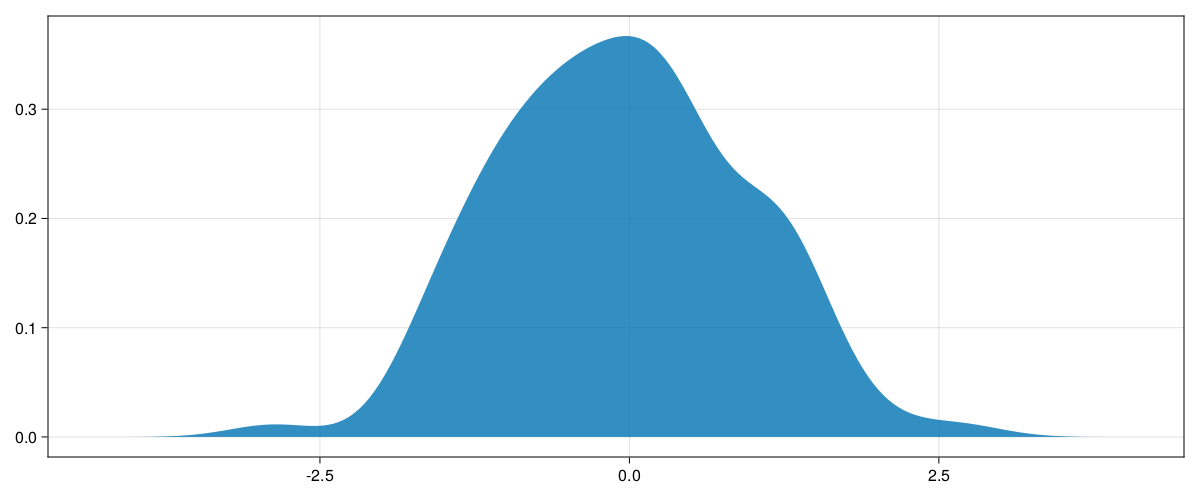

In [53]:
f

In [54]:
maximum(df.x)

10